# Parkinson's Data Exploration

This document will hold code that will allow us to gain insights on the parkinsons datasets that we have to work including disease classification, multiple sound recording, and telemonitoring. 

## Some Housekeeping
We'll start by importing any necessary packages and pulling in the data using pandas

In [1]:
# Data Manipulation
import pandas as pd
# Visualizations
import vis_utils

dc = pd.read_csv(r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\SOURCE CODE\data\disease-classification/pd_speech_features_no_top_row.csv')
msr_train = pd.read_csv(r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\SOURCE CODE\data\multiple-sound-recording/train_data.csv')
msr_test = pd.read_csv(r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\SOURCE CODE\data\multiple-sound-recording/test_data.csv')
te = pd.read_csv(r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\SOURCE CODE\data\telemonitoring/parkinsons_updrs.csv')

## Background Dataset Information

### [Disease Classification (DC) Dataset](https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#)
The data used in this study were gathered from 188 patients with Parkinsons and 64 healthy individuals. Researchers recorded the participants sustaining the phonation of the vowel /a/ for three repetitions.

Speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features were also applied to the speech recordings to extract clinically useful information for PD assessment.

### [Multiple Sound Recording (MSR) Dataset](https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings)
The training data were gathered from 20 patients with Parkinsons and 20 health individuals. Multiple types of sound recordings were taken from each participant (listed below) and expert physicians assigned each participant a Unified Parkinsonâ€™s Disease Rating Scale (UPDRS) score. 

Utterances
- 1: sustained vowel (aaaâ€¦â€¦)
- 2: sustained vowel (oooâ€¦...)
- 3: sustained vowel (uuuâ€¦...)
- 4-13: numbers from 1 to 10
- 14-17: short sentences
- 18-26: words

Features
Training Data File:
- column 1: Subject id

- columns 2-27: features
- features 1-5: Jitter (local),Jitter (local, absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp),
- features 6-11: Shimmer (local),Shimmer (local, dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda),
- features 12-14: AC,NTH,HTN,
- features 15-19: Median pitch,Mean pitch,Standard deviation,Minimum pitch,Maximum pitch,
- features 20-23: Number of pulses,Number of periods,Mean period,Standard deviation of period, features 24-26: Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks

- column 28: UPDRS
- column 29: class information

The testing data were gathered from 28 different patients with Parkinsons. The patients are asked to say only the sustained vowels 'a' and 'o' three times each, producing 168 recordings. The same 26 features are extracted from the voice samples.

Utterances
- 1-3: sustained vowel (aaaâ€¦â€¦)
- 4-6: sustained vowel (oooâ€¦â€¦)

Related source:
-   [Paper](https://www.researchgate.net/publication/260662600_Collection_and_Analysis_of_a_Parkinson_Speech_Dataset_With_Multiple_Types_of_Sound_Recordings)

### [Telemonitoring (TE) Dataset ](http://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring)
The data was gathered from 42 people with early-stage Parkinson's disease. There are 16 voice measures, and two regression measurements: motor UPDRS and total UPDRS. Each row of the dataset contain corresponds to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column.

Features
- subject# - Integer that uniquely identifies each subject
- age - Subject age
- sex - Subject gender '0' - male, '1' - female
- test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.
- motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
- total_UPDRS - Clinician's total UPDRS score, linearly interpolated
- Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
- Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE - A nonlinear dynamical complexity measure
- DFA - Signal fractal scaling exponent
- PPE - A nonlinear measure of fundamental frequency variation

## Dataset Similarities and Differences

In this section we'll take a look at some of the similarities and differences across these 3 datasets. We can begin by looking at the shape of these datasets.

In [2]:
print("Disease Classification Dataset shape: {}".format(dc.shape))
print("Multiple Sound Recoring Training Dataset shape: {}".format(msr_train.shape))
print("Multiple Sound Recoring Testing Dataset shape: {}".format(msr_test.shape))
print("Telemonitoring Datasetshape: {}".format(te.shape))

Disease Classification Dataset shape: (756, 755)
Multiple Sound Recoring Training Dataset shape: (1040, 29)
Multiple Sound Recoring Testing Dataset shape: (168, 28)
Telemonitoring Datasetshape: (5875, 22)


Immediately, we notice that the dimensionality of the DC dataset is very high in comparison to the other two datasets, with about 30 times the number of features. This is due to the speech signal processing algorithms that are run on the voice recordings on this dataset, including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features. These processes create many features.

We also note that the DC and MSR datasets have a similar number of instances, while the TE dataset has over 5 times as many instances. None of these datasets are particularly large.

## Cleaning the Data
Because these datasets come from multiple sources, we will do some cleaning using pandas.

### DC Dataset

In [3]:
# TODO: clean the DC Dataset, give it labels

### MSR Train Dataset

In [4]:
# TODO: clean the MSR Train Dataset, give it labels

### MSR Test Dataset

In [5]:
# TODO: clean the MSR Test Dataset, give it labels

### TE Dataset


In [6]:
# TODO: clean the TE Dataset

## Data Visualization and Covariance Matrices

First we will begin my creating visualizations for the correlation matrix of each dataset. We will be using a special heatmap that encodes correlation using not only color, but size. The code for this visualization is taken from this [tutorial](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec).

### Telemonitoring Covariance Matrix
Let's begin by making a covariance matrix for the Telemonitoring dataset, the most straightfoward and classical dataset we have.

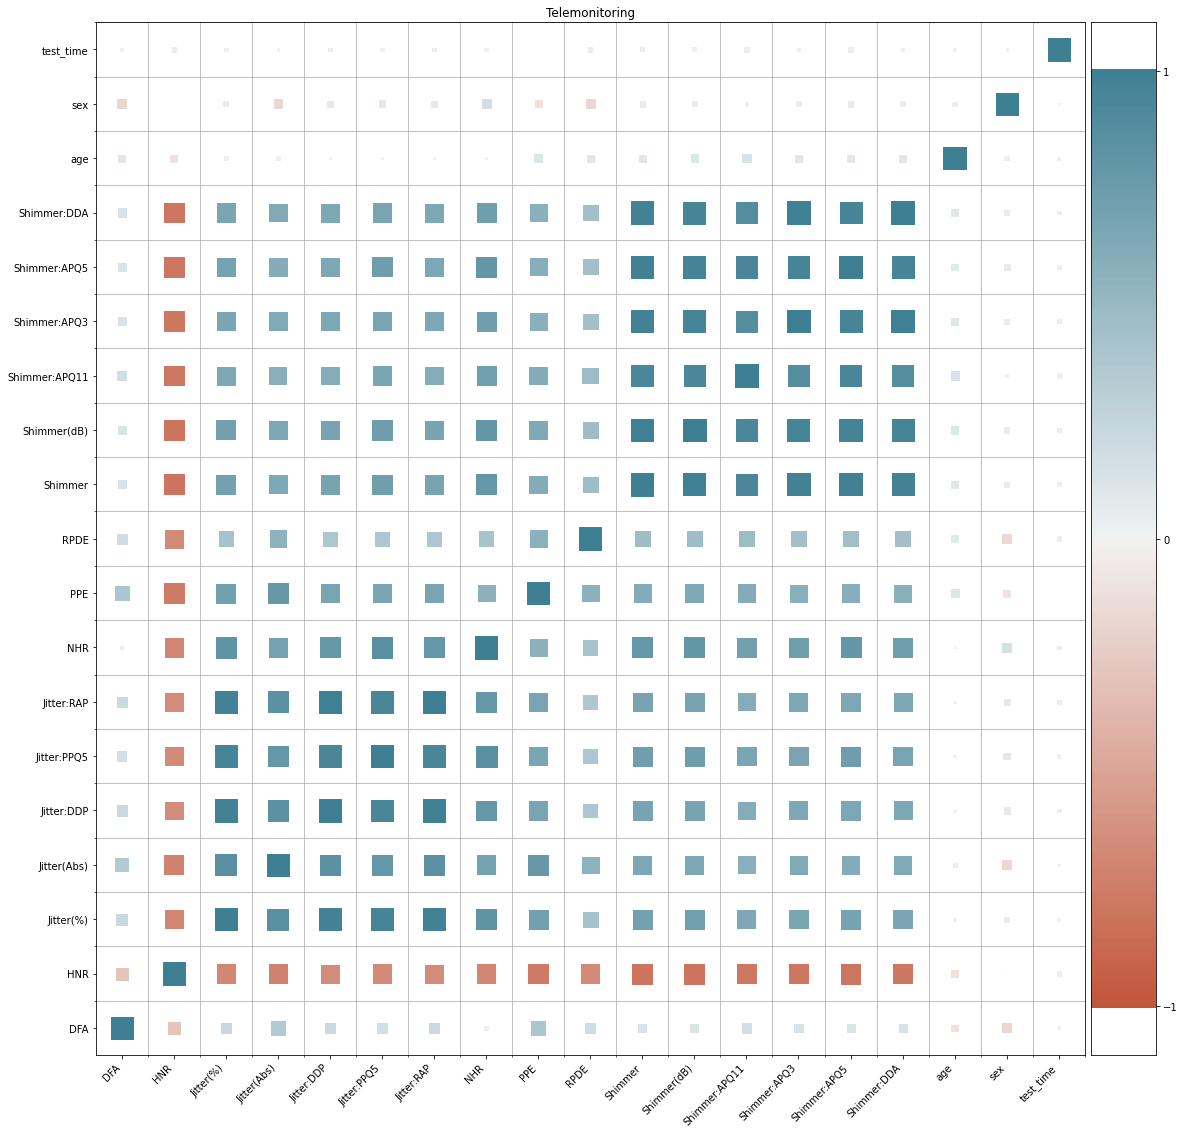

In [10]:
def make_corr_vis(filename, name, data, columns):
    # Calculate correlation
    corr = data[columns].corr()
    # Matplotlib magic
    corr = pd.melt(corr.reset_index(), id_vars='index')  # Unpivot the dataframe, so we can get pair of arrays for x and y
    corr.columns = ['x', 'y', 'value']
    # Call our helper function in vis_utils
    vis_utils.heatmap(x=corr['x'], y=corr['y'], size=corr['value'].abs(),color=corr['value'],
                      title=name, save_path=r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\Source codeS\visualizations/{}-correlation-matrix.jpg'.format(filename))

# Store each dataset with a filename friendly "filename" and a "name"
datasets = [("disease-classification", "Disease Classification", dc),
            ("multiple-sound-recoring-train", "Multiple Sound Recording Train", msr_train),
            ("multiple-sound-recoring-test", "Multiple Sound Recording Test", msr_test),
            ("telemonitoring", "Telemonitoring", te)]

# Make Telemonitoring Covariance Matrix
te_filename, te_name, te_data = datasets[3]
# Choose the columns to display
te_columns = ['age', 'sex', 'test_time', 'Jitter(%)', 
           'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
           'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
           'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
           'DFA', 'PPE']
make_corr_vis(te_filename, te_name, te_data, te_columns)

The most immediate thing to jump out from this dataset, is that many dimensions are highly correlated. This, of course, is due to having multiple features that are inextricably related, like the jitter and shimmer features. This could make our dataset a good candidate for principle component analysis.

### Multiple Sound Recording Datasets
Now let's get into the Multiple Sound Recording Datasets. These datasets are interesting in that there are two seperate train and test datasets. The data are also drawn from very different distributions of people, with the train dataset coming from a mix of people with and without Parkinson's and the test dataset being entirely composed of data collected from people with Parkinson's.

We can graph the covariance matrix of both datasets and see if they differ.

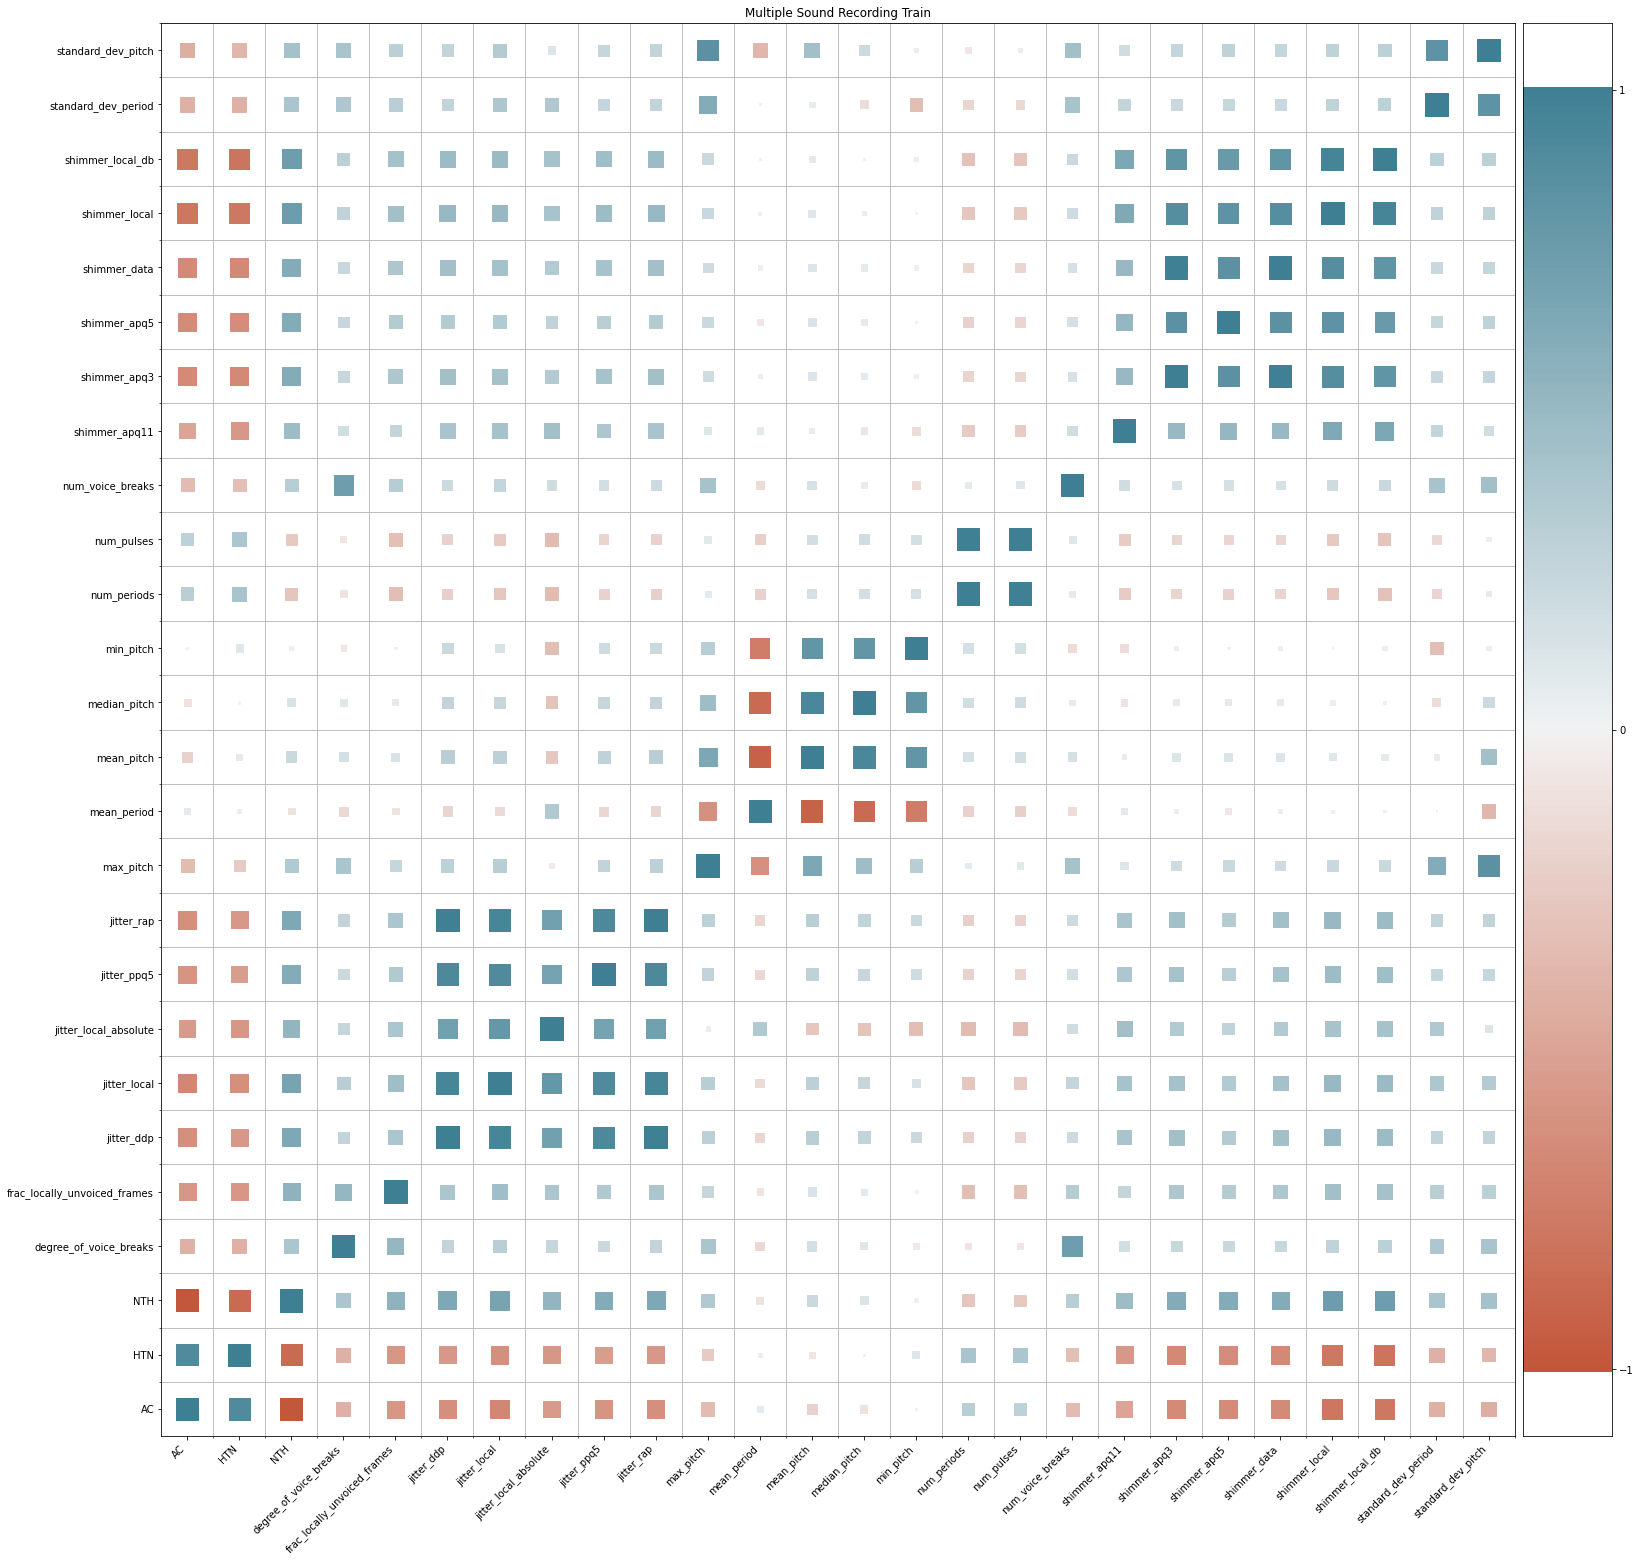

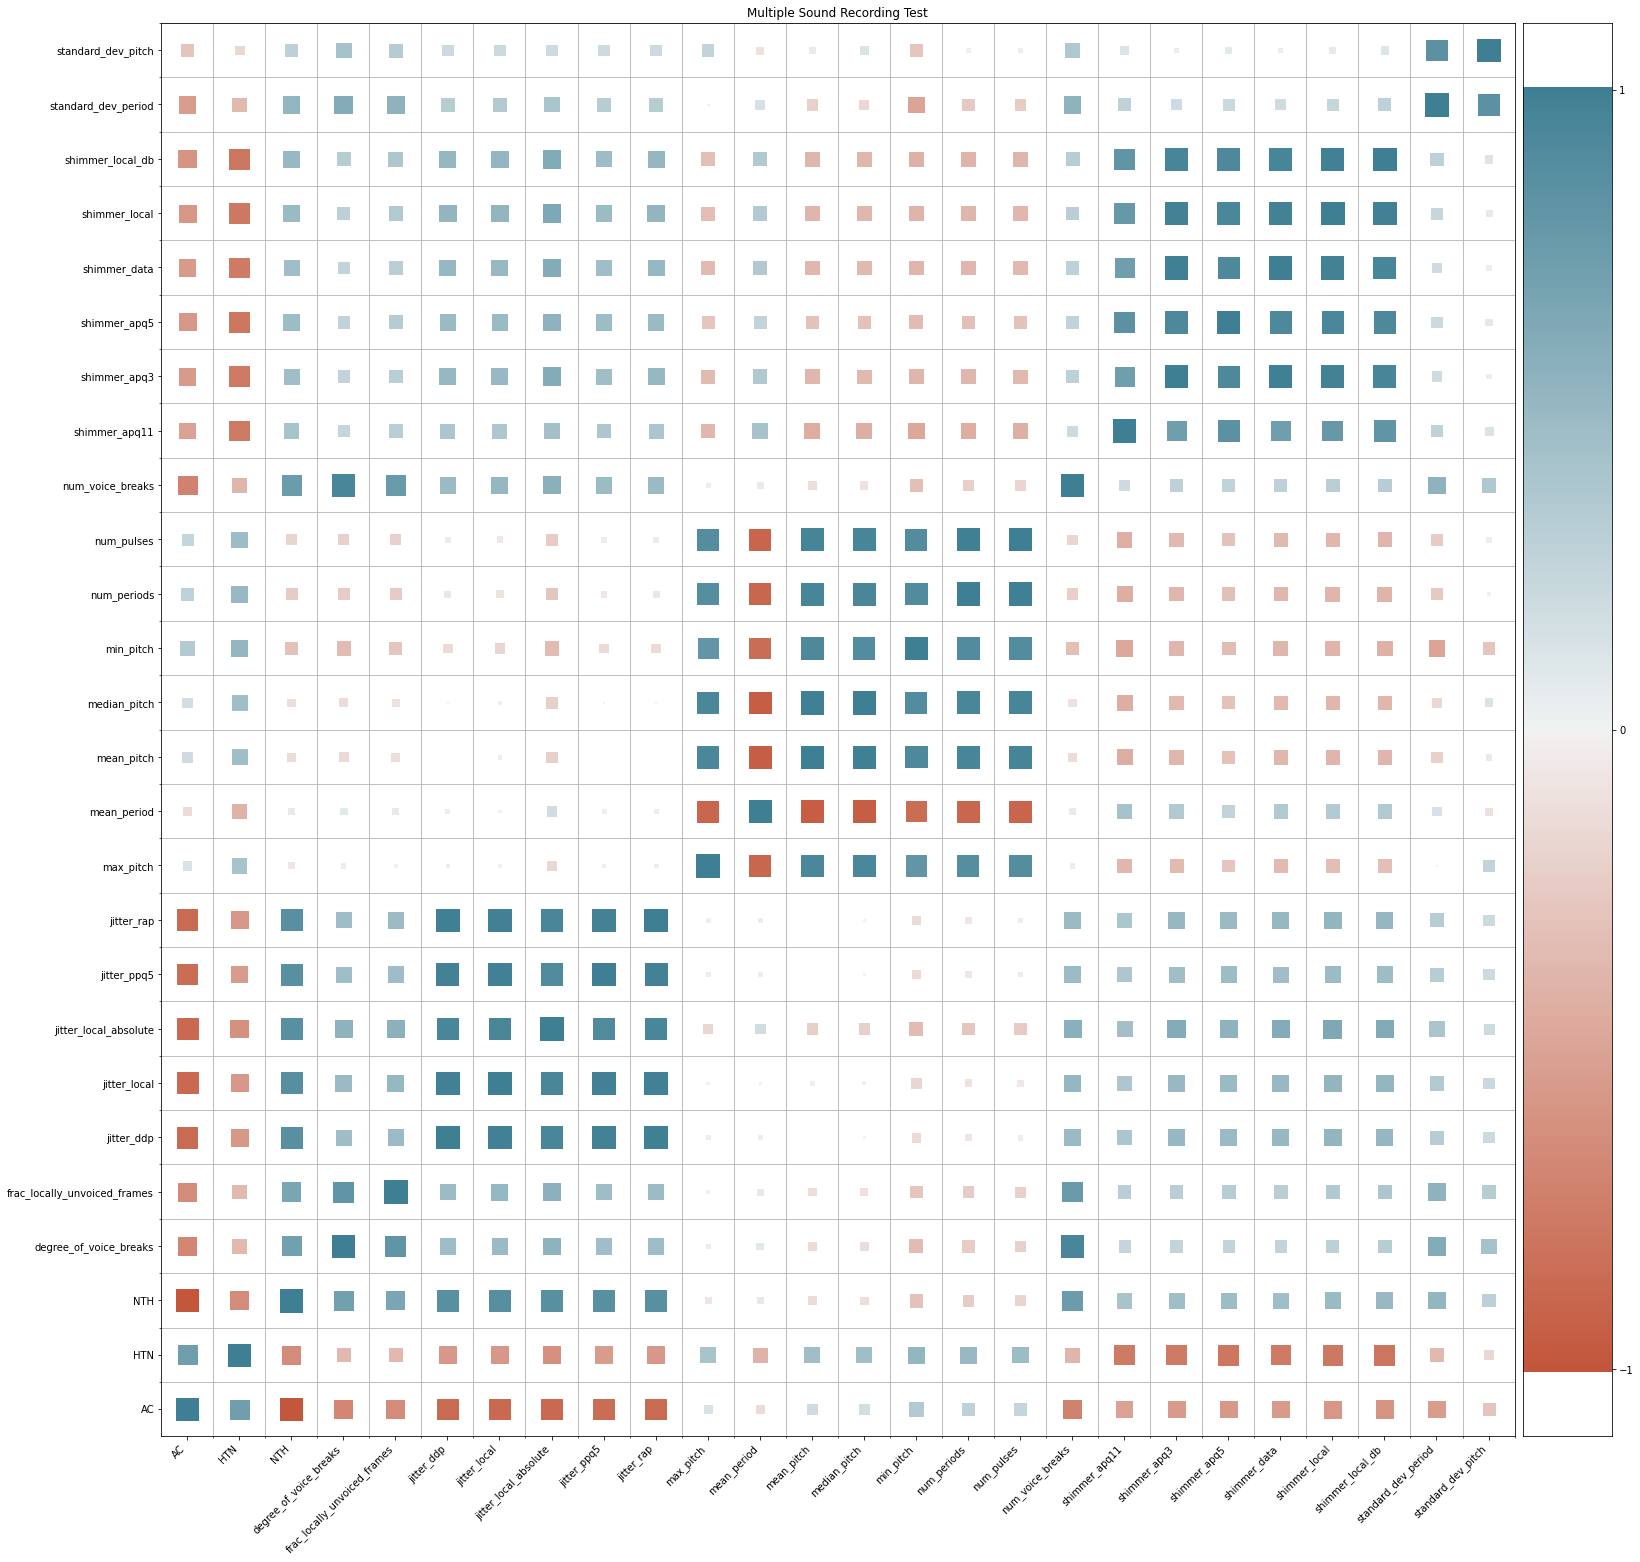

In [11]:
# Make Multiple Sound Recording Covariance Matrix
msr_columns = ['jitter_local', 'jitter_local_absolute',
               'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
               'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 
               'shimmer_apq11', 'shimmer_data', 'AC', 'NTH', 'HTN',
               'median_pitch', 'mean_pitch', 'standard_dev_pitch', 
               'min_pitch', 'max_pitch', 'num_pulses', 'num_periods',
               'mean_period','standard_dev_period', 'frac_locally_unvoiced_frames',
               'num_voice_breaks','degree_of_voice_breaks']
# Plot covariance Matrix of msr_train
msr_train_filename, msr_train_name, msr_train_data = datasets[1]
make_corr_vis(msr_train_filename, msr_train_name, msr_train_data, 
              msr_columns)
# Plot covariance Matrix of msr_test
msr_test_filename, msr_test_name, msr_test_data = datasets[2]
make_corr_vis(msr_test_filename, msr_test_name, msr_test_data, 
              msr_columns)

## Dimensionality Reduction
Looking at how highly correlated some features are, let's try doing some dimensionality reduction using PCA and LDA.

Let's begin by using PCA on the datasets and seeing how many components we need to recover 99% of the variance.

In [12]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

def intrinsic_dimension(explained_variance_ratio_, recovered_variance=.99):
    dim = 0
    partial_var = 0
    for val in explained_variance_ratio_:
        # Update dim and va
        dim += 1
        partial_var += val
        if partial_var >= recovered_variance:
            break
    return dim

print("PCA Anlaysis of DC")
print(f"Old shape of data: {dc.shape}")
# Let's first scale/center our data, using only the msr_columns
scaled_dc_data = pd.DataFrame(preprocessing.scale(dc.iloc[:, 1:-1]), columns = dc.columns[1:-1])
# Fit pca to it
pca = PCA()
pca.fit(scaled_dc_data)
# Find the number of components needed to recover 99% of variance
n_components_dc = intrinsic_dimension(pca.explained_variance_ratio_)
print(f"Components making 99% of variance: {n_components_dc}")
# Perform the pca transform using n_components needed to recover 99% of variance
pca = PCA(n_components=n_components_dc)
transformed_dc_data = pca.fit_transform(scaled_dc_data)
print(f"New shape of data: {transformed_dc_data.shape}")

print('\n______________________________________\n')

print("PCA Anlaysis of TE")
print(f"Old shape of data: {te_data.shape}")
# Let's first scale/center our data, using only the msr_columns
scaled_te_data = pd.DataFrame(preprocessing.scale(te_data[te_columns]), columns = te_columns)
# Fit pca to it
pca = PCA()
pca.fit(scaled_te_data)
# Find the number of components needed to recover 99% of variance
n_components_te = intrinsic_dimension(pca.explained_variance_ratio_)
print(f"Components making 99% of variance: {n_components_te}")
# Perform the pca transform using n_components needed to recover 99% of variance
pca = PCA(n_components=n_components_te)
transformed_te_data = pca.fit_transform(scaled_te_data)
print(f"New shape of data: {transformed_te_data.shape}")

print('\n______________________________________\n')

print("PCA Anlaysis of MSR Train")
print(f"Old shape of data: {msr_train_data.shape}")
# Let's first scale/center our data, using only the msr_columns
scaled_msr_train_data = pd.DataFrame(preprocessing.scale(msr_train_data[msr_columns]), columns = msr_columns)
# Fit pca to it
pca = PCA()
pca.fit(scaled_msr_train_data)
# Find the number of components needed to recover 99% of variance
n_components_msr_train = intrinsic_dimension(pca.explained_variance_ratio_)
print(f"Components making 99% of variance: {n_components_msr_train}")
# Perform the pca transform using n_components needed to recover 99% of variance
pca = PCA(n_components=n_components_msr_train)
transformed_msr_train_data = pca.fit_transform(scaled_msr_train_data)
print(f"New shape of data: {transformed_msr_train_data.shape}")

print('\n______________________________________\n')

print("PCA Anlaysis of MSR Test")
print(f"Old shape of data: {msr_test_data.shape}")
# Let's first scale/center our data, using only the msr_columns
scaled_msr_test_data = pd.DataFrame(preprocessing.scale(msr_test_data[msr_columns]), columns = msr_columns)
# Fit pca to it
pca = PCA()
pca.fit(scaled_msr_test_data)
# Find the number of components needed to recover 99% of variance
n_components_msr_test = intrinsic_dimension(pca.explained_variance_ratio_)
print(f"Components making 99% of variance: {n_components_msr_test}")
# Perform the pca transform using n_components needed to recover 99% of variance
pca = PCA(n_components=n_components_msr_test)
transformed_msr_test_data = pca.fit_transform(scaled_msr_test_data)
print(f"New shape of data: {transformed_msr_test_data.shape}")

# Get MSR dimension reduced data ready  
pca = PCA(n_components=n_components_msr_train)
transformed_msr_test_data_forTesting = pca.fit_transform(scaled_msr_test_data)

PCA Anlaysis of DC
Old shape of data: (756, 755)


C:\Users\DLK\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Components making 99% of variance: 245
New shape of data: (756, 245)

______________________________________

PCA Anlaysis of TE
Old shape of data: (5875, 22)
Components making 99% of variance: 11
New shape of data: (5875, 11)

______________________________________

PCA Anlaysis of MSR Train
Old shape of data: (1040, 29)
Components making 99% of variance: 17
New shape of data: (1040, 17)

______________________________________

PCA Anlaysis of MSR Test
Old shape of data: (168, 28)
Components making 99% of variance: 12
New shape of data: (168, 12)


MSR train: Explained variance ratio of the first two components: [0.64558392 0.26260677]


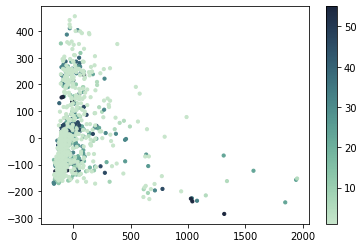

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=2)

msr_train_pca = pca.fit_transform(msr_train_data[msr_columns])
print('MSR train: Explained variance ratio of the first two components: %s'
      % str(pca.explained_variance_ratio_))
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(msr_train_pca[:,0], msr_train_pca[:,1], c=msr_train_data.UPDRS, s=10, cmap=cmap);
f.colorbar(points);

TE: Explained variance ratio of the first two components: [0.96732889 0.02643348]


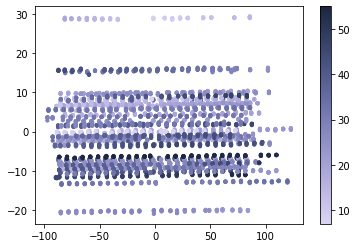

In [14]:
TE_pca = pca.fit_transform(te_data[te_columns])
print('TE: Explained variance ratio of the first two components: %s'
      % str(pca.explained_variance_ratio_))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(TE_pca[:,0], TE_pca[:,1], c=te_data.total_UPDRS, s=10, cmap=cmap);
f.colorbar(points);

As we can see, there's a pretty dramatic reduction in dimensions. For each of the datasets only about half of the initial dimensions are needed to recover 99% of the variance.

But, since we have labels for this dataset, it's important that we try LDA as well, which can utilize these labels to make intelligent dimensionality reduction, which we can use for other methods.

MSR train LDA: Explained variance ratio of the first two components: [0.43766599 0.22961422]


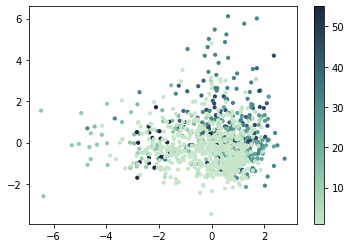

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
msr_train_lda = lda.fit_transform(msr_train_data[msr_columns], msr_train_data.UPDRS)
print('MSR train LDA: Explained variance ratio of the first two components: %s'
      % str(lda.explained_variance_ratio_))
cmap = sns.cubehelix_palette(rot=-.4,as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(msr_train_lda[:,0], msr_train_lda[:,1], c=msr_train_data.UPDRS, s=10, cmap=cmap)
f.colorbar(points);

TE LDA: Explained variance ratio of the first two components: [0.35945963 0.16734153]


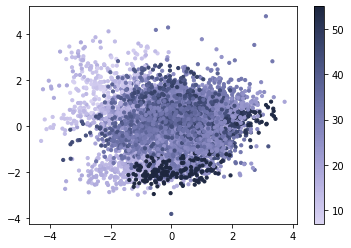

In [16]:
lda = LDA(n_components=2)
TE_lda = lda.fit_transform(te_data[te_columns],round(te_data.total_UPDRS,0))
print('TE LDA: Explained variance ratio of the first two components: %s'
      % str(lda.explained_variance_ratio_))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(TE_lda[:,0], TE_lda[:,1], c=te_data.total_UPDRS, s=10, cmap=cmap)
f.colorbar(points);

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# print("LDA Anlaysis of DC")
# print(f"Old shape of data: {dc.shape}")
# # Fit lda to it
# lda = LDA()
# lda.fit(scaled_dc_data, dc.iloc[:, -1])
# # Find the number of components needed to recover 99% of variance
# n_components = intrinsic_dimension(lda.explained_variance_ratio_)
# print(f"Components making 99% of variance: {n_components}")
# # Perform the pca transform using n_components needed to recover 99% of variance
# lda = LDA(n_components=n_components)
# transformed_dc_data = lda.fit_transform(scaled_dc_data)
# print(f"New shape of data: {transformed_dc_data.shape}")

# print('\n______________________________________\n')

## Label Visualization


Text(0.5, 1.0, 'MSR training set: UPDRS distribution')

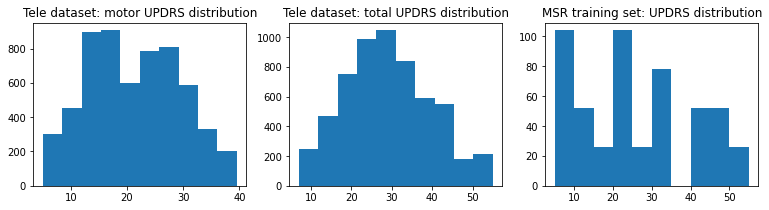

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(te['motor_UPDRS'])
ax1.set_title('Tele dataset: motor UPDRS distribution')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(te['total_UPDRS'])
ax2.set_title('Tele dataset: total UPDRS distribution')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(msr_train['UPDRS'][:int(len(msr_train['UPDRS'])/2)])
ax3.set_title('MSR training set: UPDRS distribution')

## SVM classifier


In [19]:
# Train a SVM classifier based on the PCA output
from sklearn import svm
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import numpy as np


clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(transformed_msr_train_data, msr_train['class_info']) 
y_pred = clf_linear.predict(transformed_msr_test_data_forTesting)
print('Linear Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(transformed_msr_train_data, msr_train['class_info']) 
y_pred = clf_rbf.predict(transformed_msr_test_data_forTesting)
print('RBF Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(transformed_msr_train_data, msr_train['class_info']) 
y_pred = clf_poly.predict(transformed_msr_test_data_forTesting)
print('Poly Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))


Linear Accuracy: %f 0.5178571428571429
RBF Accuracy: %f 0.5297619047619048
Poly Accuracy: %f 0.7916666666666666


## Random Forest classifier


In [20]:
# Train a Random Forest classifier based on the PCA output
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(transformed_msr_train_data, msr_train['class_info'])   
y_pred = clf.predict(transformed_msr_test_data_forTesting)
print('Random Forest Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

Random Forest Accuracy: %f 0.5714285714285714


## Decision Tree

In [21]:
# Train a Decision Tree classifier based on the PCA output
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=3)
clf.fit(transformed_msr_train_data, msr_train['class_info'])
y_pred = clf.predict(transformed_msr_test_data_forTesting)
print('Decision Tree Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

Decision Tree Accuracy: %f 0.6130952380952381


## Naive Bayes

In [22]:
# Train a Gaussian Naive Bayes classifier based on the PCA output
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(transformed_msr_train_data, msr_train['class_info'])
y_pred = gnb.predict(transformed_msr_test_data_forTesting)
print('Naive Bayes Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

Naive Bayes Accuracy: %f 0.8452380952380952


## Neural Network

In [23]:
# Train a Neural Network MLP classifier based on the PCA output
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(transformed_msr_train_data, msr_train['class_info'])
y_pred = clf.predict(transformed_msr_test_data_forTesting)
print('Neural Network Accuracy: %f', accuracy_score(np.ones(y_pred.shape), y_pred))

Neural Network Accuracy: %f 0.5416666666666666


C:\Users\DLK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Combining MSR and TE datasets to improve accuracy

To improve the accuracy of the classifers above, we combined the MSR training and TE datasets to perform predictions on the MSR test data set. The MSR and TE datasets had 13 overlapping features:
- Jitter
- Jitter(Abs)
- Jitter:RAP
- Jitter:PPQ5
- Jitter:DDP
- Shimmer
- Shimmer(dB)
- Shimmer:APQ3
- Shimmer:APQ5
- Shimmer:APQ11
- Shimmer:DDA
- NHR
- HNR

We reduced the MSR training set and TE datasets to these features and performed predictions. As you can see, after combining both sets, our accuracy improved for each classifier.

In [24]:
print(te)

      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0        

In [33]:
# Scale and Transform data
msrtrain_TE = pd.read_csv(r'F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\SOURCE CODE\data\multiple-sound-recording/TE_MSRtrain_combined.csv')
msr_TE_columns = msrtrain_TE.columns[4:17]
scaled_msrtrain_TE = pd.DataFrame(preprocessing.scale(msrtrain_TE[msr_TE_columns]), columns = msr_TE_columns)
scaled_msrtrain_TE

pca = PCA()
pca.fit(scaled_msrtrain_TE)
n_components_msrTE = intrinsic_dimension(pca.explained_variance_ratio_)
print(f"Components making 99% of variance: {n_components_msrTE}")
pca = PCA(n_components=n_components_msrTE)
transformed_msrtrain_TE = pca.fit_transform(scaled_msrtrain_TE)

#MSR testing data
# select overlapping features
msr_test_data_TEmsr = msr_test_data[['jitter_local', 'jitter_local_absolute',
               'jitter_rap', 'jitter_ppq5', 'jitter_ddp', 'shimmer_local',
               'shimmer_local_db', 'shimmer_apq3', 'shimmer_apq5', 
               'shimmer_apq11', 'shimmer_data', 'NTH', 'HTN']]
# use same feature names
msr_test_data_TEmsr.columns = msrtrain_TE.columns[4:17]
#reduce dimensionality
pca = PCA(n_components=n_components_msrTE)
scaled_msr_test_data_TEmsr = pd.DataFrame(preprocessing.scale(msr_test_data_TEmsr[msr_TE_columns]), columns = msr_TE_columns)
transformed_msr_test_data_TEmsr_forTesting = pca.fit_transform(scaled_msr_test_data_TEmsr)

Components making 99% of variance: 8


### SVM classifier

In [34]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(transformed_msrtrain_TE, msrtrain_TE.Class) 
y_pred = clf_linear.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Linear Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(transformed_msrtrain_TE, msrtrain_TE.Class)  
y_pred = clf_rbf.predict(transformed_msr_test_data_TEmsr_forTesting)
print('RBF Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

clf_poly = svm.SVC(kernel='poly')
clf_poly.fit(transformed_msrtrain_TE, msrtrain_TE.Class) 
y_pred = clf_poly.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Poly Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

Linear Accuracy: 100.0 %
RBF Accuracy: 100.0 %
Poly Accuracy: 97.0 %


### Random Forest classifier

In [35]:
# Train a Random Forest classifier based on the PCA output

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(transformed_msrtrain_TE, msrtrain_TE.Class)   
y_pred = clf.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Random Forest Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

Random Forest Accuracy: 100.0 %


### Decision Tree

In [36]:
clf = DecisionTreeClassifier(random_state=3)
clf.fit(transformed_msrtrain_TE, msrtrain_TE.Class)   
y_pred = clf.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Decision Tree Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

Decision Tree Accuracy: 80.4 %


### Naïve Bayes

In [37]:
gnb = GaussianNB()
gnb.fit(transformed_msrtrain_TE, msrtrain_TE.Class)
y_pred = gnb.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Naïve Bayes Accuracy:', 100*round(accuracy_score(np.ones(y_pred.shape), y_pred),3),'%')

Naïve Bayes Accuracy: 86.9 %


### Neural Network

In [38]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)
clf.fit(transformed_msrtrain_TE, msrtrain_TE.Class)
y_pred = clf.predict(transformed_msr_test_data_TEmsr_forTesting)
print('Neural Network Accuracy:', 100*accuracy_score(np.ones(y_pred.shape), y_pred), '%')

Neural Network Accuracy: 94.04761904761905 %


C:\Users\DLK\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Predicting UPDRS Score
Parkinson's severity is scored on the UPDRS score. Since we have these scores for the MSR training dataset and the TE dataset, we wanted to test if we could predict these scores with random forest and ridge regression. Again, we will use the TE and MSR training combined set. This time, the data will be normalized (l2 norm) before using the supervised learning algorithms.

In [39]:
msr_TE_columns = msrtrain_TE.columns[4:17]
# l2 normalize each feature
normTEmsr = pd.DataFrame(preprocessing.normalize(msrtrain_TE[msr_TE_columns], norm='l2',axis=1), columns = msr_TE_columns)
labels = np.array(msrtrain_TE.UPDRS)
# now split into test (10%), and train (90%) sets since the MSR test data set does not have UPDRS scores
from sklearn.model_selection import train_test_split
train, test, trainy, testy = train_test_split(normTEmsr, labels, test_size = 0.1, random_state=3)

### Random Forest

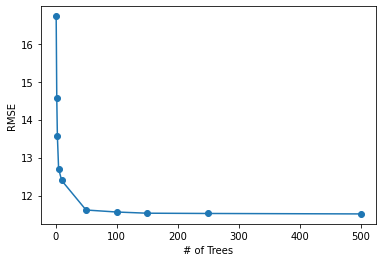

In [40]:
# Choose number of trees
from sklearn.ensemble import RandomForestRegressor
trees = [1,2,3,5,10,50,100,150,250,500]
RMSE = []
for i in trees:
    rf = RandomForestRegressor(n_estimators=i, random_state=3)
    rf.fit(train, trainy)
    predictions = rf.predict(test)
    RMSE.append(np.sqrt(metrics.mean_squared_error(testy, predictions)))
plt.plot(trees, RMSE, '-o')
plt.xlabel('# of Trees')
plt.ylabel('RMSE');

Mean Absolute Error: 9.16
Root Mean Squared Error: 11.57


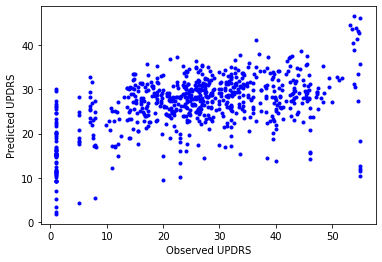

In [41]:
# Using 100 trees as determined above
rf = RandomForestRegressor(n_estimators=100, random_state=3)
rf.fit(train, trainy)
predictions = rf.predict(test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(testy, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(testy, predictions)),2))
plt.plot(testy, predictions, '.', color='b')
plt.xlabel('Observed UPDRS')
plt.ylabel('Predicted UPDRS');

Now, the random forest is not accurate for non-Parkinson's people. However, removing patients with UPDRS scores of 1 does not greatly improve the random forest (similar RMSE).

Mean Absolute Error: 8.58
Root Mean Squared Error: 10.7


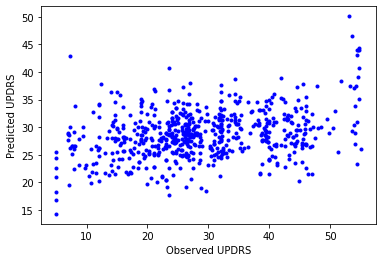

In [42]:
noones = msrtrain_TE.loc[labels>1]
normpark = pd.DataFrame(preprocessing.normalize(noones[msr_TE_columns], norm='l2',axis=1), columns = msr_TE_columns)
labels = np.array(noones.UPDRS)
# now split into test (10%), and train (90%) sets 
train, test, trainy, testy = train_test_split(normpark, labels, test_size = 0.1, random_state=3)
rf = RandomForestRegressor(n_estimators=100, random_state=3)
rf.fit(train, trainy)
predictions = rf.predict(test)
print('Mean Absolute Error:', round(metrics.mean_absolute_error(testy, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(testy, predictions)),2))
plt.plot(testy, predictions, '.', color='b')
plt.xlabel('Observed UPDRS')
plt.ylabel('Predicted UPDRS');

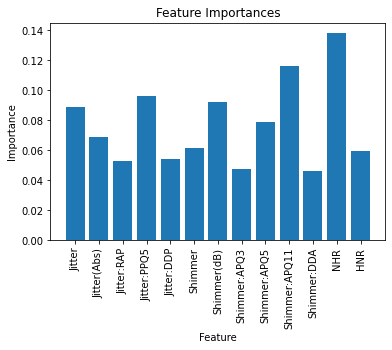

In [43]:
# Now let's investigate the most important features in this random forest
importances = list(rf.feature_importances_)
x = list(range(len(importances)))
plt.bar(x, importances, orientation = 'vertical')
plt.xticks(x, msr_TE_columns, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances');

## Library for audio feature extraction
- Original software: http://www.fon.hum.uva.nl/praat/ (it seems they don't have one for MacOS...)
- Another related source: https://github.com/jcvasquezc/DisVoice/tree/master/phonation
- Python port of Praat https://github.com/YannickJadoul/Parselmouth (We will be using this for feature computation)
- Script based on: https://github.com/drfeinberg/PraatScripts

## Feature description:
- Jitter: analysis of speaker's voic pitch
- Shimmer: analysis of speaker's voice amplitude
Ref: https://www.cs.upc.edu/~nlp/papers/far_jit_07.pdf

## Demo Feature Extraction From Sound Files
Things Extracted:
- mean pitch, stdev pitch, harmonicity mean, jitter(local), jitter(abs, local), jitter(rap), ppq5Jitter, jitter(ddp), shimmer(local), shimmer(localdb), shimmer(apq3), shimmer(apq5), shimmer(apq11), shimmer(dda), mean period, stdev period, num periods, HTN (aka HNR)
This to find:
- anything on voice breaks
- unvoiced frames
- min pitch
- max pitch
- NTH
- Autocorrelation (harmonicity)


In [48]:
# imports 
import parselmouth
from parselmouth.praat import call
sound = parselmouth.Sound(r"F:\2nd page\72. Machine Learning Approaches for Detection and Diagnosis of Parkinson’s Disease\SOURCE CODE\data\mozillaClips/tstClip.mp3")

In [49]:
f0min = 75
f0max = 600
unit = "Hertz"
#using male default params
pitch = call(sound, "To Pitch", 0.0, f0min, f0max) 
meanF0 = call(pitch, "Get mean", 0, 0, unit) 
stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) 
harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
hnr = call(harmonicity, "Get mean", 0, 0)
pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
localJitter = call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
rapJitter = call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3)
ppq5Jitter = call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3)
ddpJitter = call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3)
localShimmer =  call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq3Shimmer = call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
aqpq5Shimmer = call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
apq11Shimmer =  call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
ddaShimmer = call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
print(meanF0, stdevF0, hnr, localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer)

236.00976740043924 193.9376143459247 9.724241207396744 0.04443067743077206 0.000195566041915513 0.022225449747266104 0.02638867003122353 0.06667634924179831 0.12730117762655563 1.3667099278389143 0.05367953813983158 0.08405807507080366 0.14708959662341287 0.16103861441949474


In [50]:
meanPeriod = call(pointProcess, "Get mean period", 0, 0, 0.0001, 0.02, 1.3)
print(meanPeriod)

0.004401599372870843


In [51]:
standardDeviation = call(pointProcess, "Get stdev period", 0, 0, 0.0001, 0.02, 1.3)
print(standardDeviation)

0.003646300800568915


In [52]:
numperiods = call(pointProcess, "Get number of periods", 0, 0, 0.0001, 0.02, 1.3)
print(numperiods)

777


Now let's run these all at one and create a dataset!

Let's now save the dataset